* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#
## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
# pd.read_excel 로 데이터를 불러옵니다.
# 데이터의 용량이 커서 로드하는데 1분 이상 걸릴 수도 있습니다. 로드가 될 때까지 기다려주세요!
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
# df = pd.read_excel("data/Online Retail.xlsx")
df = pd.read_csv("data/online_retail.csv")
df.shape

(541909, 8)

## 데이터 미리보기 및 요약

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 기술통계

In [7]:
# describe 를 통해 수치 타입의 기술통계를 구합니다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# describe 를 통해 np.object 타입의 기술통계를 구합니다.
df.describe(include=np.object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


## 결측치

In [9]:
# 결측치 합계를 구합니다.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# 결측치 비율을 구합니다.
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

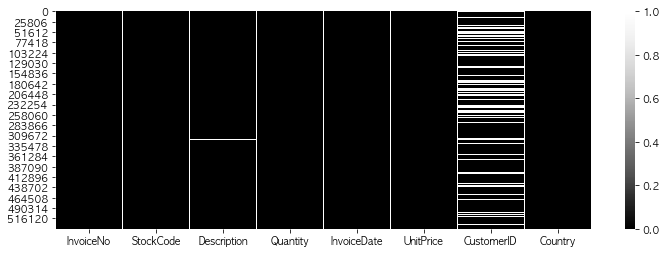

In [11]:
# 결측치를 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap="Greys_r")

## 히스토그램으로 전체 수치변수 시각화

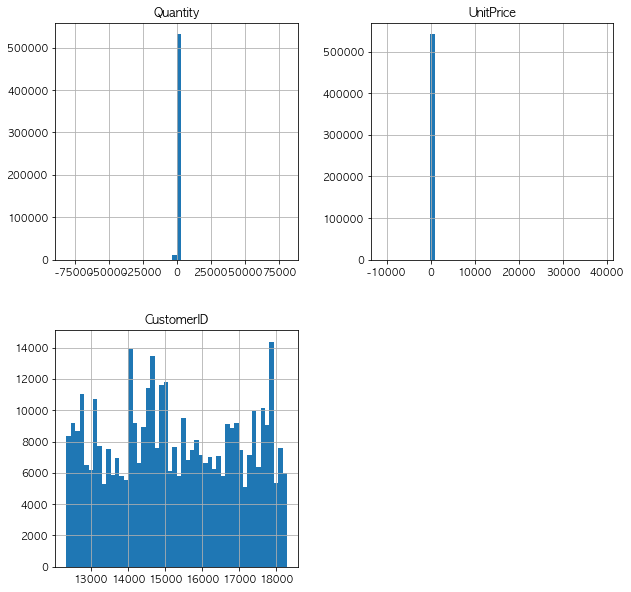

In [12]:
_ = df.hist(figsize=(10, 10), bins=50)

## 전체 주문금액 파생변수 만들기
* 수량 X 금액으로 전체 금액 계산하기

In [13]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

## 회원 vs 비회원 구매

In [14]:
# CustomerID값이 결측치인 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [15]:
# CustomerID값이 결측치가 **아닌** 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df["CustomerID"].notnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [16]:
# 결측치 여부 컬럼 생성
df["id_null"] = df["CustomerID"].isnull()

In [17]:
# 비회원 구매 빈도수
df["id_null"].value_counts()

False    406829
True     135080
Name: id_null, dtype: int64

In [18]:
# 비회원 구매 비율
df["id_null"].value_counts()

False    406829
True     135080
Name: id_null, dtype: int64

In [19]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False


## 매출액 상위 국가

In [20]:
# TotalPrice를 통해 매출액 상위 10개 국가를 구합니다.
# 매출액의 평균과 합계를 구합니다.
top_sale_country = df.groupby(
    "Country")["TotalPrice"].agg(["mean", "sum"]).sort_values("sum", ascending=False).head(10)
top_sale_country.style.format("{:,}")

,mean,sum
Country,,
United Kingdom,16.525065419655363,"8,187,806.364"
Netherlands,120.05969633066216,"284,661.54"
EIRE,32.12259882869693,"263,276.82"
Germany,23.348942601369142,"221,698.21"
France,23.06928830197499,"197,403.9"
Australia,108.87789515488483,"137,077.27"
Switzerland,28.164510489510487,"56,385.35"
Spain,21.624390051322543,"54,774.58"
Belgium,19.773301111648138,"40,910.96"


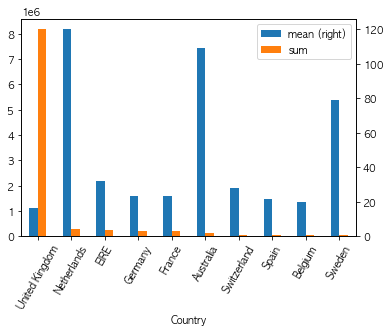

In [21]:
# 위에서 구한 결과를 barplot으로 시각화 합니다.
# 스케일이 다르기 때문에 2축 그래프를 사용하지만 두 가지 값을 비교하기에 적절해 보이진 않습니다.
top_sale_country.plot.bar(secondary_y="mean", rot=60)

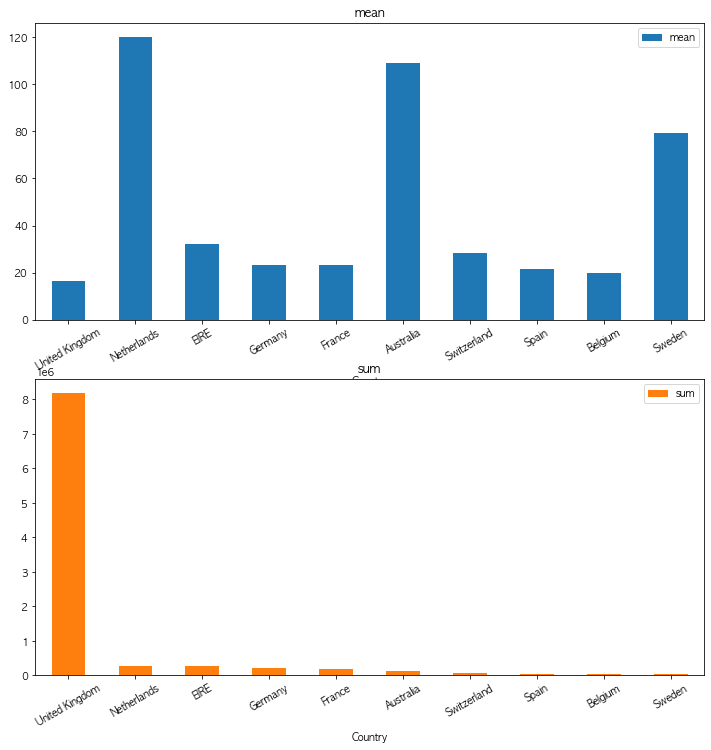

In [22]:
# 서브플롯으로 다시 시각화 해봅니다.
_ = top_sale_country.plot.bar(subplots=True, figsize=(12, 12), sharex=False, rot=30)

## 고객별 구매 취소 비율

In [23]:
# Quantity 가 0보다 작다면 Cancel로 True, False 값을 Cancel 컬럼으로 생성
df["Cancel"] = df["Quantity"] < 0

In [24]:
# CustomerID, Cancel로 그룹화 하여 InvoiceNo 의 빈도수를 구함
# 고객별 Cancel 빈도수를 구함
cancel_customer = df.groupby(["CustomerID", "Cancel"])["InvoiceNo"].count().unstack()
cancel_customer["cancel_ratio"] = (cancel_customer[True] / cancel_customer[False]) * 100
cancel_customer.sort_values(True, ascending=False).head(15)
cancel_customer.sample(10)

Cancel,False,True,cancel_ratio
CustomerID,,,
17001.0,169.0,NaN,NaN
15874.0,120.0,17.0,14.166667
12582.0,22.0,NaN,NaN
14995.0,61.0,NaN,NaN
15797.0,8.0,NaN,NaN
17955.0,19.0,NaN,NaN
16582.0,6.0,NaN,NaN
17988.0,38.0,1.0,2.631579
12681.0,638.0,8.0,1.253918


### 특정 고객의 구매 건 조회

In [25]:
# 취소 건은 InvoiceNo 에 C를 붙이고 Quantity 를 마이너스로 표기하는 것을 확인
df[df["CustomerID"] == 14311.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel
152427,549592,79000,MOROCCAN TEA GLASS,12,2011-04-11 10:14:00,0.85,14311.0,United Kingdom,10.20,False,False
152428,549592,47566,PARTY BUNTING,4,2011-04-11 10:14:00,4.95,14311.0,United Kingdom,19.80,False,False
152429,549592,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-04-11 10:14:00,2.95,14311.0,United Kingdom,17.70,False,False
152430,549592,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-04-11 10:14:00,1.25,14311.0,United Kingdom,15.00,False,False
152431,549592,22829,SWEETHEART WIRE WALL TIDY,2,2011-04-11 10:14:00,9.95,14311.0,United Kingdom,19.90,False,False
152432,549592,21318,GLASS CHALICE BLUE SMALL,36,2011-04-11 10:14:00,0.39,14311.0,United Kingdom,14.04,False,False
152433,549592,22221,CAKE STAND LOVEBIRD 2 TIER PINK,2,2011-04-11 10:14:00,9.95,14311.0,United Kingdom,19.90,False,False
152434,549592,84968A,SET OF 16 VINTAGE ROSE CUTLERY,1,2011-04-11 10:14:00,12.75,14311.0,United Kingdom,12.75,False,False
152435,549592,22766,PHOTO FRAME CORNICE,8,2011-04-11 10:14:00,2.95,14311.0,United Kingdom,23.60,False,False
152436,549592,21756,BATH BUILDING BLOCK WORD,3,2011-04-11 10:14:00,5.95,14311.0,United Kingdom,17.85,False,False


### 제품별 구매 취소 비율

In [26]:
# "StockCode", "Cancel" 로 그룹화 하고 "InvoiceNo" 로 빈도수를 구함
cancel_stock = df.groupby(["StockCode", "Cancel"])["InvoiceNo"].count().unstack()
cancel_stock["cancel_ratio"] = (cancel_stock[True] / cancel_stock[False]) * 100
cancel_stock.sort_values(True, ascending=False).head(10)

Cancel,False,True,cancel_ratio
StockCode,,,
M,327.0,244.0,74.617737
22423,2019.0,184.0,9.113422
POST,1130.0,126.0,11.150442
22960,1142.0,87.0,7.618214
D,NaN,77.0,NaN
22720,1401.0,76.0,5.424697
21232,843.0,61.0,7.236062
S,2.0,61.0,3050.000000
22699,1084.0,54.0,4.981550


### 국가별 구매 취소 비율

In [27]:
# "Country", "Cancel" 로 그룹화 하고 "InvoiceNo" 로 빈도수를 구함
cancel_country = df.groupby(["Country", "Cancel"])["InvoiceNo"].count().unstack()
cancel_country["cancel_ratio"] = (cancel_country[True] / cancel_country[False]) * 100
cancel_country.sort_values(True, ascending=False).head(10)

Cancel,False,True,cancel_ratio
Country,,,
United Kingdom,486286.0,9192.0,1.890246
Germany,9042.0,453.0,5.009954
EIRE,7894.0,302.0,3.825690
France,8408.0,149.0,1.772122
USA,179.0,112.0,62.569832
Australia,1185.0,74.0,6.244726
Spain,2485.0,48.0,1.931590
Italy,758.0,45.0,5.936675
Belgium,2031.0,38.0,1.871000


## 날짜와 시간

In [28]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [29]:
# year, month, day, dayofweek 를 구해서 파생변수로 생성합니다.
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek

In [30]:
# day_name() 을 통해 요일명을 생성할 수도 있습니다.
df["InvoiceDayname"] = df["InvoiceDate"].dt.day_name()

In [31]:
# 연도에서 앞에서 7개문자만 가져오면 연, 월만 따로 구할 수 있습니다.
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]

In [32]:
# time, hour 에 대한 파생변수도 구합니다.
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour

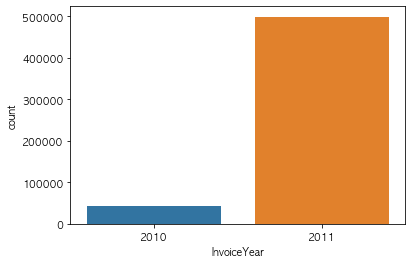

In [33]:
# countplot으로 연도(InvoiceYear)별 빈도수 시각화
sns.countplot(data=df, x="InvoiceYear")

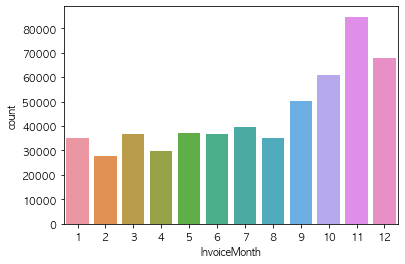

In [34]:
# countplot으로 월(InvoiceMonth)별 빈도수 시각화
sns.countplot(data=df, x="InvoiceMonth")

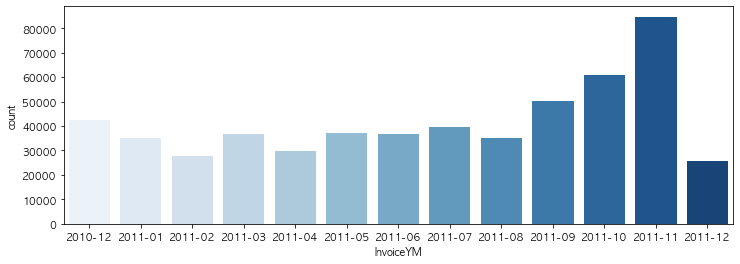

In [35]:
# countplot으로 연도-월별(InvoiceYM) 빈도수 시각화
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceYM", palette="Blues")

### 요일별 빈도수

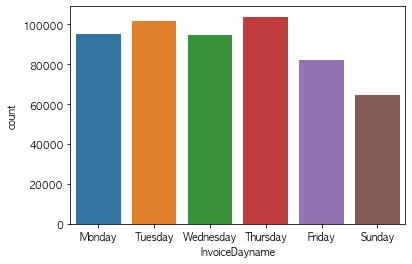

In [36]:
# countplot으로 요일별 빈도수 시각화
sns.countplot(data=df.sort_values("InvoiceDow"), x="InvoiceDayname")

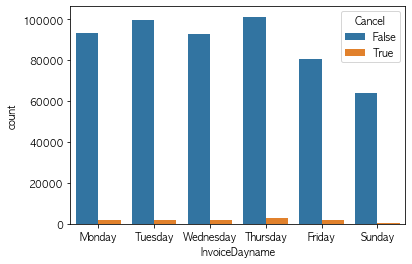

In [37]:
# countplot으로 요일별 빈도수 시각화, hue="Cancel" 로 취소여부도 함께 보기
sns.countplot(data=df.sort_values("InvoiceDow"), x="InvoiceDayname", hue="Cancel")

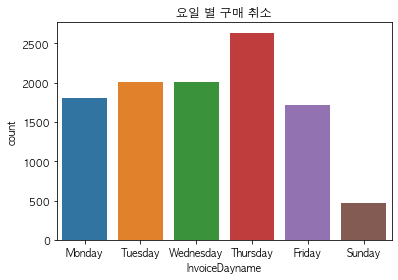

In [38]:
# countplot으로 요일 별 구매 취소 빈도수 시각화
# df["Cancel"] == True 인 데이터만 보기
plt.title("요일 별 구매 취소")
sns.countplot(data=df[df["Cancel"]].sort_values("InvoiceDow"), x="InvoiceDayname")

In [39]:
# 리스트컴프리헨션을 통해 "월~일"요일 문자열을 리스트로 만듭니다.
day_name = [w for w in "월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [40]:
# 데이터를 보면 토요일이 없습니다. 그래서 토요일은 제거합니다.
day_name.remove("토")
day_name

['월', '화', '수', '목', '금', '일']

In [41]:
# InvoiceDow 의 빈도수를 구합니다.
dow_count = df["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name
dow_count

월     95111
화    101808
수     94565
목    103857
금     82193
일     64375
Name: InvoiceDow, dtype: int64

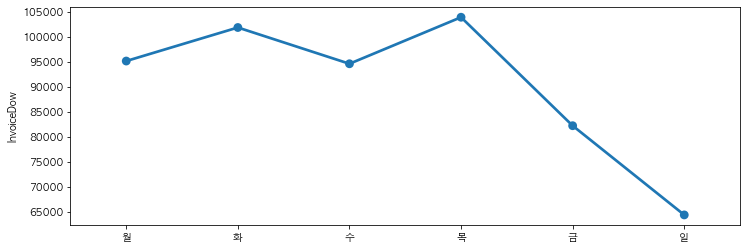

In [42]:
# 위에서 구한 dow_count 를 pointplot으로 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(x=dow_count.index, y=dow_count)

In [43]:
# InvoiceHour, InvoiceDow 로 crosstab 을 통해 빈도수 구하기
# .style.background_gradient() 로 빈도수의 색상 시각화
order_hour_dow = pd.crosstab(df["InvoiceHour"], df["InvoiceDow"])
order_hour_dow

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


In [44]:
# 데이터에 토요일이 없음
order_hour_dow.columns = [w for w in "월화수목금일"]
order_hour_dow.style.background_gradient()

,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


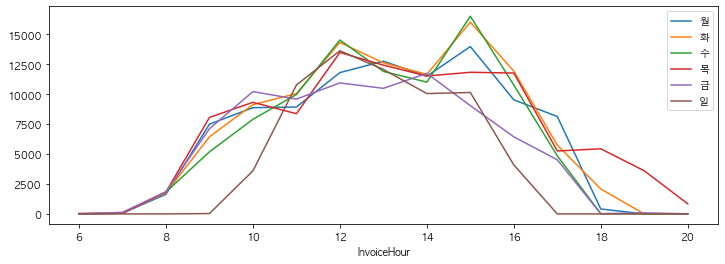

In [45]:
# order_hour_dow 시각화
order_hour_dow.plot(figsize=(12, 4))

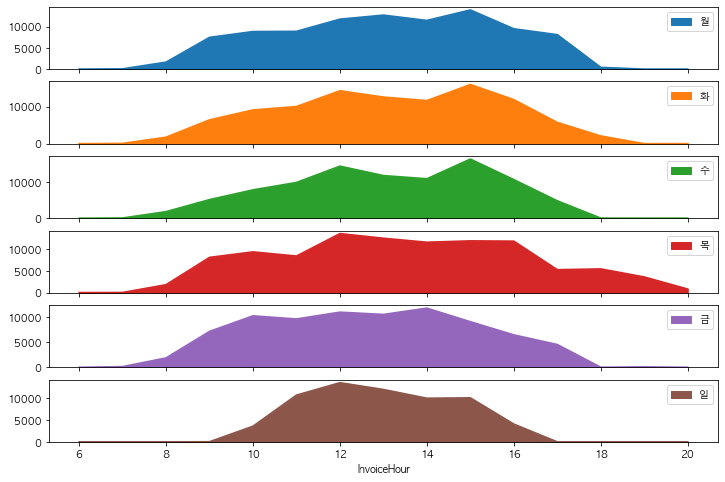

In [46]:
# order_hour_dow 시각화, subplots 그리기
_ = order_hour_dow.plot.area(figsize=(12, 8), subplots=True)

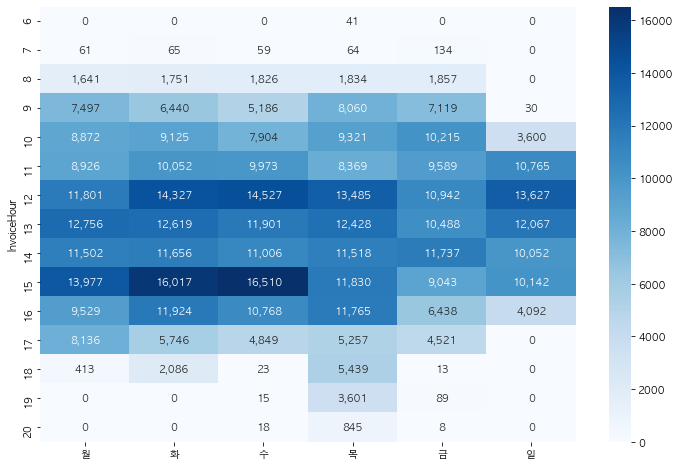

In [47]:
# order_hour_dow 를 heatmpap 으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(order_hour_dow, annot=True, fmt=",.0f", cmap="Blues")

### 시간대 빈도수

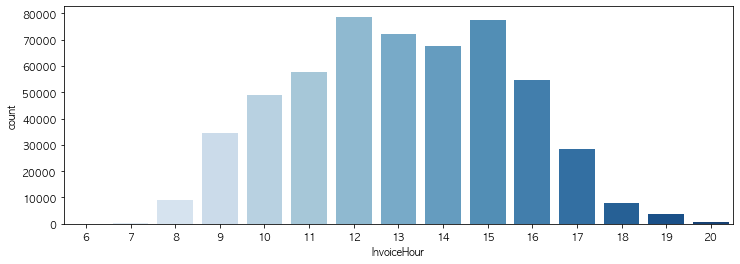

In [48]:
# countplot으로 시간대 빈도수 시각화
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceHour", palette="Blues")

In [49]:
# value_counts 로 빈도수를 구합니다.
hour_count = df["InvoiceHour"].value_counts().sort_index()
hour_count

6        41
7       383
8      8909
9     34332
10    49037
11    57674
12    78709
13    72259
14    67471
15    77519
16    54516
17    28509
18     7974
19     3705
20      871
Name: InvoiceHour, dtype: int64

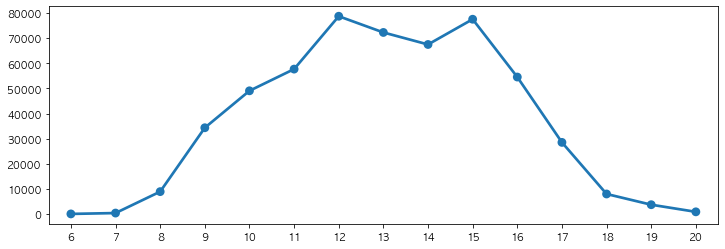

In [50]:
# pointplot 으로 빈도수를 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(x=hour_count.index, y=hour_count.values, ci=None)

## 고객ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

* 취소와 취소에 대한 본 주문건 제거
* 고객ID가 없는 건도 제거

In [51]:
df.shape

(541909, 19)

In [52]:
df["InvoiceNoRemoveC"] = df["InvoiceNo"].str.replace("C", "")

In [53]:
df["InvoiceNoRemoveC"] = df["InvoiceNoRemoveC"].fillna(df["InvoiceNo"])

In [54]:
# "InvoiceNoRemoveC", "StockCode", "Description", "CustomerID" 가 중복인 데이터를 확인함
df[df.duplicated(["InvoiceNoRemoveC", "StockCode", "Description", "CustomerID"])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,3.75,False,False,2010,12,1,2,Wednesday,2010-12,09:41:00,9,536381
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,6.35,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,10.50,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,12.70,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom,0.65,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom,5.45,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538


In [55]:
# "InvoiceNoRemoveC", "StockCode", "Description", "CustomerID" 가 중복인 건을 drop_duplicates 로 삭제함
# 삭제 후 데이터를 df_valid 변수에 할당
df_valid = df.drop_duplicates(["InvoiceNoRemoveC", "StockCode", "Description", "CustomerID"], keep=False).copy()
df_valid = df_valid[df_valid["CustomerID"].notnull()].copy()
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587


## 고객

In [56]:
# 전체 고객수, 고객 한 명당 평균 구매 횟수
cust_count = df_valid.groupby(["CustomerID"])["InvoiceNo"].count()
cust_count

CustomerID
12346.0      2
12347.0    182
12348.0     23
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    626
18287.0     66
Name: InvoiceNo, Length: 4371, dtype: int64

In [57]:
# 위에서 구한 구매횟수의 기술통계 값을 구함
cust_count.describe()

count    4371.000000
mean       88.649737
std       220.315053
min         1.000000
25%        17.000000
50%        40.000000
75%        96.000000
max      7279.000000
Name: InvoiceNo, dtype: float64

In [58]:
# cust_count.to_frame(name="count") 으로 데이터프레임으로 변환
df_cust_count = cust_count.to_frame(name="count")
df_cust_count

,count
CustomerID,
12346.0,2
12347.0,182
12348.0,23
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


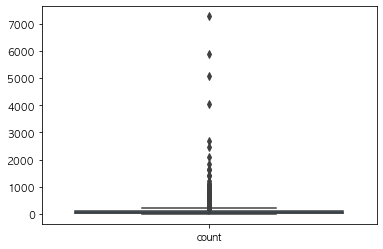

In [59]:
# df_cust_count 를 boxplot 으로 시각화
sns.boxplot(data=df_cust_count)

## 월단위 데이터 전처리

In [60]:
# 함수를 통해 연도-월-1 로 일자를 모두 1로 만듭니다.
# 1일자로 만드는 이유는 월별 잔존률을 구하기 위함입니다.
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

In [61]:
# map을 통해 위에서 만든 함수를 적용합니다.
# InvoiceDate1 이라는 파생변수를 생성합니다.
df_valid["InvoiceDate1"] = df_valid["InvoiceDate"].map(get_month_day1)

In [62]:
# 고객별로 가장 첫 구매일을 구합니다.
# 1일자로 만든 구매일 - 첫구매일을 구하면 첫 구매 후 몇달 후 구매인지를 구할 수 있습니다.
df_valid.groupby('CustomerID')['InvoiceDate1'].transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDate1, Length: 387488, dtype: datetime64[ns]

In [63]:
# 위에서 구한 첫 구매일인 InvoiceDate1의 최솟값을 구해 InvoiceDateMin 변수에 할당합니다.
df_valid["InvoiceDateMin"] = df_valid.groupby('CustomerID')['InvoiceDate1'].transform('min')

In [64]:
# 1일자로 만든 구매일 - 첫구매일을 구하면 첫 구매 후 몇달 후 구매인지를 구할 수 있습니다. 
# 연도별 차이 - 월별 차이를 구합니다.
# 날짜는 모두 1일자 기준이기 때문에 이 계산으로 첫 구매로 부터 해당 구매 데이터가 몇 달 후 데이터인지를 알 수 있습니다.
year_diff = df_valid["InvoiceDate1"].dt.year - df_valid["InvoiceDateMin"].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid["InvoiceDateMin"].dt.month

In [65]:
# 구매 후 몇 달이 지났는지를 계산합니다.
# CohortIndex 변수를 생성합니다. 연도차이 * 12개월 + 월차이 + 1 
df_valid["CohortIndex"] = year_diff * 12 + month_diff + 1

### 코호트 월별 빈도수

In [66]:
# CohortIndex 값으로 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수를 value_counts 로 구합니다.
df_valid["CohortIndex"].value_counts()

1     112481
2      27788
4      27088
6      26591
3      26396
5      24986
7      23305
8      23151
10     23052
12     22803
9      22667
11     20137
13      7043
Name: CohortIndex, dtype: int64

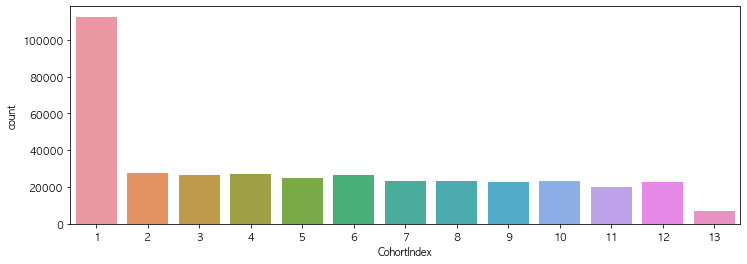

In [67]:
# countplot 으로 빈도수를 구합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x="CohortIndex")

In [68]:
df_valid.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,...,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC,InvoiceDate1,InvoiceDateMin,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,...,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01,1


## 월별, 주문건, 주문제품 종류 수, 중복을 제외한 고객 수, 총 주문금액

In [69]:
df_valid.groupby('InvoiceMonth').agg({"InvoiceNo":"count", 
                                      "StockCode":"nunique", 
                                      "CustomerID":"nunique",
                                      "UnitPrice":"sum",
                                      "Quantity":"sum",
                                      "TotalPrice":"sum"
                                     }).style.format("{:,}")

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceMonth,,,,,,
1,"21,027","2,147",783,"70,891.61","266,291","469,202.27"
2,"19,518","2,134",798,"64,538.26","260,358","433,166.39"
3,"26,732","2,231","1,020","92,455.76","340,630","574,851.69"
4,"22,473","2,220",899,"81,559.001","275,526","422,658.871"
5,"28,059","2,225","1,079","123,511.72","364,940","643,165.53"
6,"26,973","2,339","1,051","127,268.75","352,460","599,568.36"
7,"26,562","2,360",992,"91,000.771","357,698","569,722.031"
8,"26,774","2,359",980,"85,502.65","382,728","610,788.59"
9,"39,444","2,547","1,301","122,745.571","531,839","922,708.871"


## 잔존 빈도 구하기

In [70]:
# "InvoiceDateMin", "CohortIndex" 으로 그룹화를 하고 "InvoiceNo" 의 빈도수를 구해 
cohort_count = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["InvoiceNo"].count().unstack()
cohort_count.index = cohort_count.index.astype(str)
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,25222.0,10587.0,8851.0,11595.0,9786.0,12308.0,11470.0,11547.0,11591.0,14482.0,13694.0,21428.0,7043.0
2011-01-01,10440.0,2274.0,2964.0,2292.0,3714.0,3214.0,2792.0,2848.0,3854.0,4860.0,6014.0,1375.0,NaN
2011-02-01,8393.0,1423.0,1846.0,2367.0,2181.0,2002.0,2159.0,2604.0,2805.0,2818.0,429.0,NaN,NaN
2011-03-01,10750.0,1430.0,2450.0,2317.0,2384.0,2075.0,2717.0,3398.0,3928.0,892.0,NaN,NaN,NaN
2011-04-01,7119.0,1419.0,1301.0,1277.0,1333.0,1991.0,1808.0,2066.0,489.0,NaN,NaN,NaN,NaN
2011-05-01,5801.0,1071.0,866.0,918.0,1439.0,2222.0,1803.0,688.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,5419.0,868.0,702.0,1470.0,1601.0,2293.0,556.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4826.0,521.0,1269.0,1275.0,1651.0,486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,4627.0,1560.0,2787.0,2744.0,897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


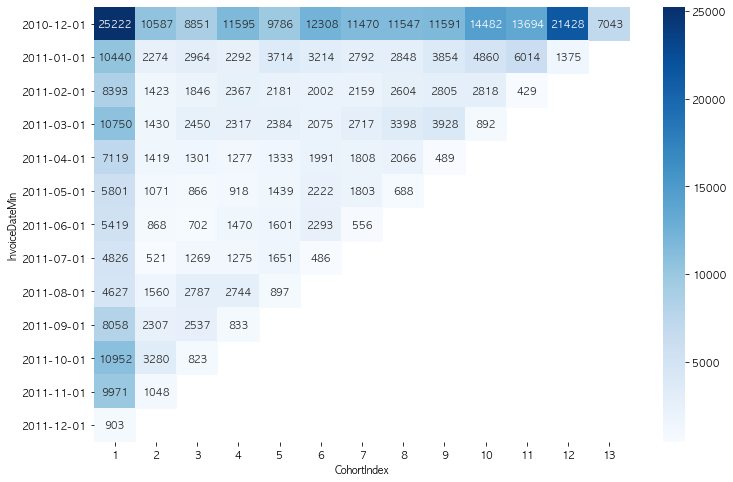

In [71]:
# heatmap을 통해 위에서 구한 잔존률을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot=True, fmt=".0f", cmap="Blues")

## 잔존율 구하기

In [72]:
# 잔존비율을 구합니다. 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됩니다.
cohort_ratio = cohort_count.div(cohort_count.iloc[:, 0], axis=0).round(2) * 100
cohort_ratio

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,100.0,42.0,35.0,46.0,39.0,49.0,45.0,46.0,46.0,57.0,54.0,85.0,28.0
2011-01-01,100.0,22.0,28.0,22.0,36.0,31.0,27.0,27.0,37.0,47.0,58.0,13.0,NaN
2011-02-01,100.0,17.0,22.0,28.0,26.0,24.0,26.0,31.0,33.0,34.0,5.0,NaN,NaN
2011-03-01,100.0,13.0,23.0,22.0,22.0,19.0,25.0,32.0,37.0,8.0,NaN,NaN,NaN
2011-04-01,100.0,20.0,18.0,18.0,19.0,28.0,25.0,29.0,7.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.0,15.0,16.0,25.0,38.0,31.0,12.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.0,13.0,27.0,30.0,42.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,11.0,26.0,26.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,34.0,60.0,59.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


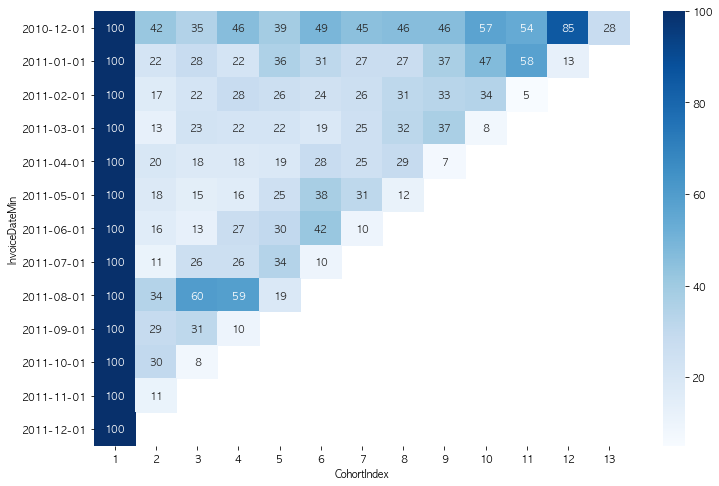

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_ratio, annot=True, fmt=".0f", cmap="Blues")